Straighten Image
====

Once we've segmented the cementum, we want to transform the image to only include the straightened segment of cementum.

TODO: use the model to find the masks

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
"""
Open the model

"""

'\nOpen the model\n\n'

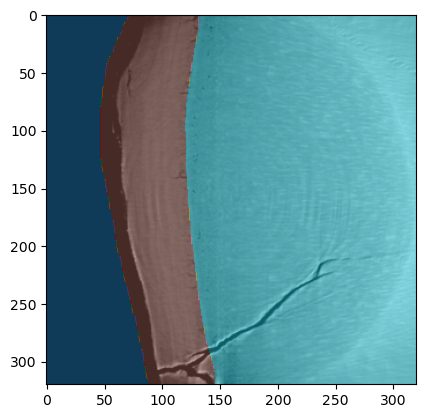

In [4]:
"""
Choose which images to straighten

"""
import pickle
import matplotlib.pyplot as plt

with open("cementum_data.pickle", "rb") as data:
    _, _, test_images, test_masks = pickle.load(data)


# Just pick the first image for now
image, mask = test_images[0], test_masks[0]
plt.imshow(image, cmap="grey")
plt.imshow(mask, cmap="tab10", alpha=0.5)

In [5]:
"""
Run segmentation on these images to get masks

"""

'\nRun segmentation on these images to get masks\n\n'

In [6]:
"""
Convert the masks from integers to uint8

"""
import numpy as np

assert (np.unique(mask) == [0, 1, 2]).all()

normalised_mask = (
    (mask - np.min(mask)) * 255.0 / (np.max(mask) - np.min(mask))
).astype(np.uint8)

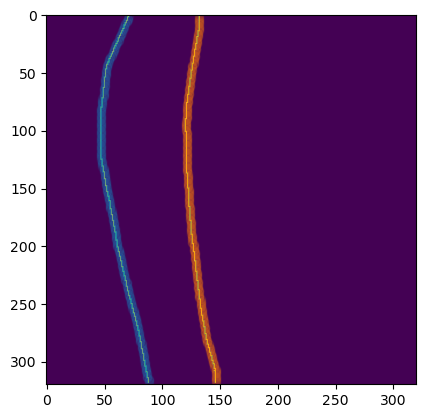

In [25]:
"""
Identify edges and fit a polynomial that approximately fits

"""
from cementum import straighten

# Find edges
edges = straighten.find_edges(normalised_mask)
assert len(np.unique(edges)) == 5, f"{np.unique(edges)=}"

# Choose a value above which to consider an edge
edge_threshold = 10
edges[edges > edge_threshold] = 1.0

plt.imshow(edges)

# Perform the fit
a, b = straighten._identify_edges(edges)
plt.plot(a[:, 0], a[:, 1], "o", alpha=0.1)
plt.plot(b[:, 0], b[:, 1], "o", alpha=0.1)

straighten.fit_edges(edges)

In [35]:
"""
Find a midpoint between the edges, simplify the curve and extend it at both ends

"""

'\nFind a midpoint between the edges, simplify the cure and extend it at both ends\n\n'

In [8]:
"""
Create an array of points along the x axis that are the same distance apart as the points on the curve

"""

'\nCreate an array of points along the x axis that are the same distance apart as the points on the curve\n\n'

In [9]:
"""
Perform an affine transformation mapping the original points to these new points

"""

'\nPerform an affine transformation mapping the original points to these new points\n\n'